In [9]:
# Import necessary libraries for neural network implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings
warnings.filterwarnings('ignore')

In [10]:
# Load the fuel consumption dataset
df = pd.read_csv('Fuel_Consumption_2000-2022.csv')
df.head()

,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [11]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   YEAR              22556 non-null  int64  
 1   MAKE              22556 non-null  object 
 2   MODEL             22556 non-null  object 
 3   VEHICLE CLASS     22556 non-null  object 
 4   ENGINE SIZE       22556 non-null  float64
 5   CYLINDERS         22556 non-null  int64  
 6   TRANSMISSION      22556 non-null  object 
 7   FUEL              22556 non-null  object 
 8   FUEL CONSUMPTION  22556 non-null  float64
 9   HWY (L/100 km)    22556 non-null  float64
 10  COMB (L/100 km)   22556 non-null  float64
 11  COMB (mpg)        22556 non-null  int64  
 12  EMISSIONS         22556 non-null  int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 2.2+ MB


In [12]:
# Check for missing values
df.isnull().sum()

YEAR                0
MAKE                0
MODEL               0
VEHICLE CLASS       0
ENGINE SIZE         0
CYLINDERS           0
TRANSMISSION        0
FUEL                0
FUEL CONSUMPTION    0
HWY (L/100 km)      0
COMB (L/100 km)     0
COMB (mpg)          0
EMISSIONS           0
dtype: int64

In [13]:
# Display statistical summary of numerical columns
df.describe()

,YEAR,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
count,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000,22556.000000
mean,2011.554442,3.356646,5.854141,12.763513,8.919126,11.034341,27.374534,250.068452
std,6.298269,1.335425,1.819597,3.500999,2.274764,2.910920,7.376982,59.355276
min,2000.000000,0.800000,2.000000,3.500000,3.200000,3.600000,11.000000,83.000000
25%,2006.000000,2.300000,4.000000,10.400000,7.300000,9.100000,22.000000,209.000000
50%,2012.000000,3.000000,6.000000,12.300000,8.400000,10.600000,27.000000,243.000000
75%,2017.000000,4.200000,8.000000,14.725000,10.200000,12.700000,31.000000,288.000000
max,2022.000000,8.400000,16.000000,30.600000,20.900000,26.100000,78.000000,608.000000


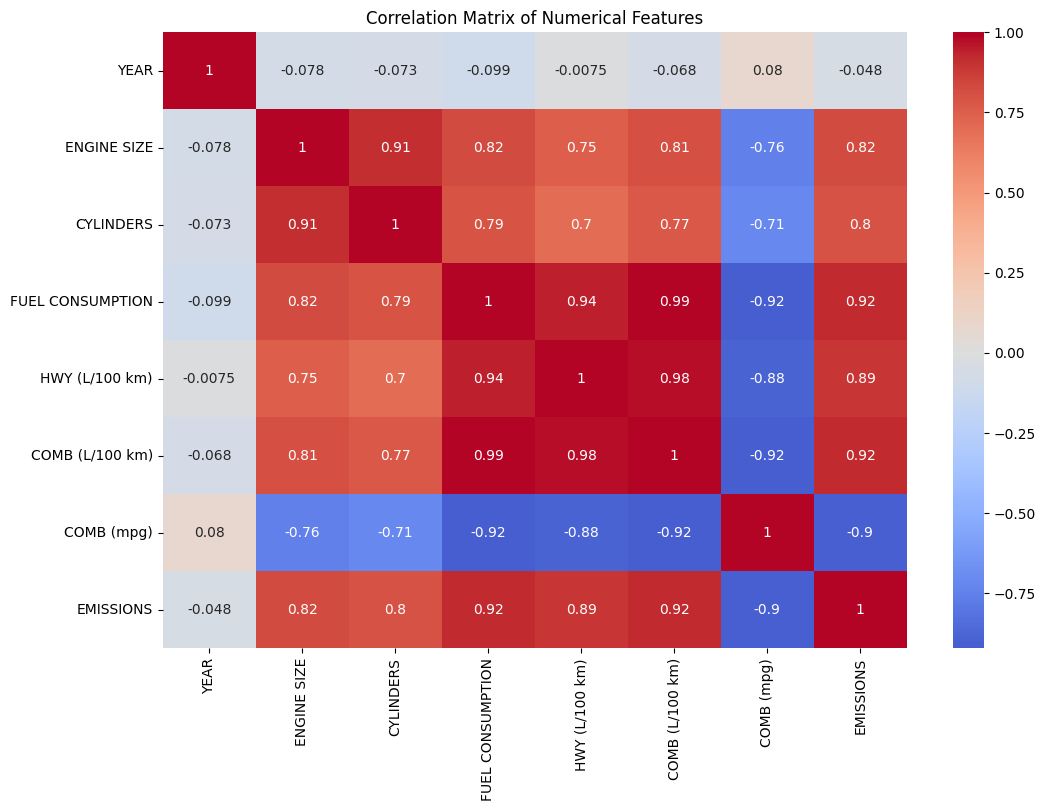

In [14]:
# Visualize correlation matrix of numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [15]:
# Create fuel efficiency categories for classification (low, medium, high efficiency)
df['FUEL_EFFICIENCY'] = pd.cut(df['FUEL CONSUMPTION'], 
                              bins=[0, 8, 12, float('inf')], 
                              labels=['High', 'Medium', 'Low'])
df['FUEL_EFFICIENCY'].value_counts()

FUEL_EFFICIENCY
Low       11967
Medium     9292
High       1297
Name: count, dtype: int64

In [16]:
# Prepare independent variables (features)
feature_columns = ['YEAR', 'ENGINE SIZE', 'CYLINDERS', 'HWY (L/100 km)', 'COMB (L/100 km)', 'EMISSIONS']
X = df[feature_columns].copy()
X.head()

,YEAR,ENGINE SIZE,CYLINDERS,HWY (L/100 km),COMB (L/100 km),EMISSIONS
0,2000,1.6,4,6.7,8.1,186
1,2000,1.6,4,6.5,7.6,175
2,2000,3.2,6,7.4,10.0,230
3,2000,3.5,6,9.2,11.5,264
4,2000,1.8,4,7.0,8.6,198


In [17]:
# Prepare dependent variable (target)
y = df['FUEL_EFFICIENCY'].copy()
y.head()

0    Medium
1    Medium
2       Low
3       Low
4    Medium
Name: FUEL_EFFICIENCY, dtype: category
Categories (3, object): ['High' < 'Medium' < 'Low']

In [18]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)
y_encoded[:10]

array([2, 2, 1, 1, 2, 2, 2, 1, 1, 2])

In [19]:
# Split dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (18044, 6)
Testing set size: (4512, 6)


In [20]:
# Perform feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(f"Scaled training features shape: {X_train_scaled.shape}")
print(f"Scaled testing features shape: {X_test_scaled.shape}")

Scaled training features shape: (18044, 6)
Scaled testing features shape: (4512, 6)


In [21]:
# Initialize Artificial Neural Network with 2 hidden layers of 6 neurons each
model = Sequential()

# First hidden layer with 6 neurons and ReLU activation
model.add(Dense(6, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer with 6 neurons and tanh activation
model.add(Dense(6, activation='tanh'))

# Output layer with 3 neurons for 3 classes and softmax activation
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 105 (420.00 B)

 Trainable params: 105 (420.00 B)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile the neural network with Adam optimizer, categorical crossentropy loss and accuracy metric
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [23]:
# Fit the neural network with batch_size=32 and epochs=100
history = model.fit(X_train_scaled, y_train, 
                    batch_size=32, 
                    epochs=100, 
                    validation_data=(X_test_scaled, y_test), 
                    verbose=0)

print("Neural network training completed!")

Neural network training completed!


In [24]:
# Evaluate the model performance on test set
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Test Accuracy: 0.9916
Test Loss: 0.0193


In [25]:
# Make predictions on test set
y_pred = model.predict(X_test_scaled, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=le.classes_))

Classification Report:
              precision    recall  f1-score   support

        High       1.00      0.95      0.97       259
         Low       0.99      1.00      1.00      2394
      Medium       0.99      0.99      0.99      1859

    accuracy                           0.99      4512
   macro avg       0.99      0.98      0.99      4512
weighted avg       0.99      0.99      0.99      4512



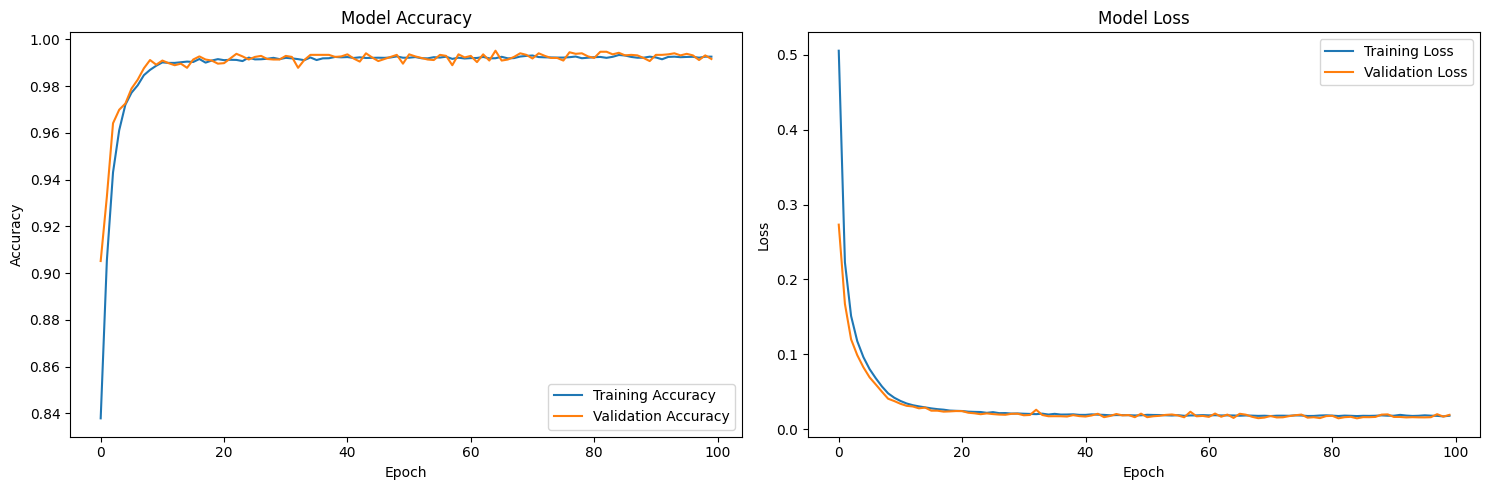

In [26]:
# Plot training history (accuracy and loss)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot accuracy
ax1.plot(history.history['accuracy'], label='Training Accuracy')
ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
ax1.set_title('Model Accuracy')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot loss
ax2.plot(history.history['loss'], label='Training Loss')
ax2.plot(history.history['val_loss'], label='Validation Loss')
ax2.set_title('Model Loss')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Loss')
ax2.legend()

plt.tight_layout()
plt.show()

In [27]:
# Alternative model with different activation functions (ReLU, Sigmoid)
model2 = Sequential()

# First hidden layer with 6 neurons and ReLU activation
model2.add(Dense(6, input_dim=X_train_scaled.shape[1], activation='relu'))

# Second hidden layer with 6 neurons and sigmoid activation
model2.add(Dense(6, activation='sigmoid'))

# Output layer with 3 neurons and softmax activation
model2.add(Dense(3, activation='softmax'))

# Compile and train the alternative model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(X_train_scaled, y_train, batch_size=32, epochs=100, 
                      validation_data=(X_test_scaled, y_test), verbose=0)

# Evaluate alternative model
test_loss2, test_accuracy2 = model2.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Alternative Model Test Accuracy: {test_accuracy2:.4f}")

Alternative Model Test Accuracy: 0.9931
